# Fyrirlestraræfing 31. janúar 2018
Þessi æfing snýst um teikningu með Matplotlib. Byrjið á að nústilla með því að keyra næsta reit.

In [1]:
#BYRJA -- Keyrið til að frumstilla numpy o.fl.
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)
%matplotlib inline
np.set_printoptions(precision=2, floatmode='fixed', suppress=True)

### 1. Teikning af gröfum falla
1. Með því að nota linspace með
hæfilegu skrefi má nálga graf falls með bútum af línustrikum. Við getum t.d. teiknað graf sínus-fallsins á bilinu $[0, 4\pi]$ með:

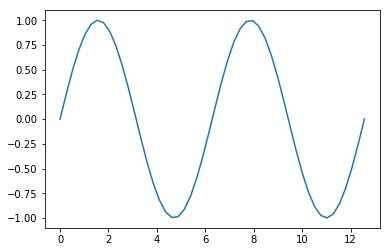

In [2]:
#EINFALT-GRAF
pi = np.pi
t = np.linspace(0, 4*pi)
plt.plot(t, np.sin(t));

2. Hér er hægt að bæta ýmislegt. Afritið reitinn #EINFALT-GRAF í nýjan reit og prófið svo:

   - Við getum teigt á grafinu (breikkað myndina) með skipuninni ``plt.figure(figsize=(12,4))`` (á undan plot).
   - Ef grannt er skoðað sjást línustrikin. Mýkra graf fæst t.d. með ``linspace(0, 4*pi, 200)``
   - Svo má bæta við rúðuneti með ``plt.grid``
   - Það er hægt að teikna x- og y-ása með ``plt.axhline`` og ``plt.axvline``.
   - Við getum látið x-ásinn ná t.d. frá -0.2 til $4\pi$ með ``plt.xlim([-0.2, 4*pi])``. 
   - Það má fjarlægja rammann með ``plt.box(False)``
   - Síðasta tötsið fæst með ``plt.tick_params(length=0)``

3. Teiknið í framhaldi $y = \cos x$ inn á sömu mynd.

4. Teiknið nú nýja mynd með $y = e^x$ á bilinu $[-5, 2]$.

### 2. Teikning punktasafns og jafna bestu línu
1. Í eftirfarandi reit (#PLÖNTUR) eru búin til slembigögn (sem gætu t.d. sýnt hæð 50 trjáa $y$ sem fall af aldri þeirra, $x$). Hér fylgir $y$  líkaninu:

$$
    y = 1.5 x + 0.3 + \varepsilon
$$

þar sem $x$ er normaldreifð skekkja með meðaltal 0 og staðalfrávik 0.7.

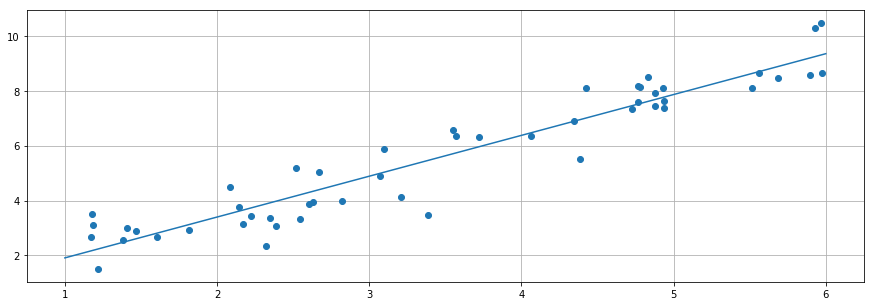

In [3]:
#PLÖNTUR
n = 50
x = 1 + 5*npr.random(n)     # Jafnt dreifð gögn á bilinu [1,6]
e = 0.7*npr.normal(size=n)  # Normaldreifðar skekkjur með staðalfrávik 0.7
y = 1.5*x + 0.3 + e
# print(x,y)
plt.figure(figsize=(15,5))
xy = np.c_[x,y]
plt.scatter(x,y)
plt.grid()
(a,b) = np.polyfit(x,y,1)
X = np.array([1,6])
Y = a*X + b
plt.plot(X,Y);

2. Ef við prentum ``x`` og ``y`` beint út (t.d. með ``print(x,y)``) þá parast samstæð gildi ekki.
   Ein leið til að bæta úr því    er að búa til fylki með tvo dálka, ``x`` og ``y``. 
   Það má gera með virkjanum np.c_[⋅,⋅] (c fyrir *column*):

        xy = np.c_[x,y]
        
   (það er líka til np.r_ virki, og ágæt útskýring er í þessu 
   [Quora svari](https://www.quora.com/Can-anybody-elaborate-the-use-of-c_-in-numpy)

3. En ekkert kemur samt í staðinn fyrir góða mynd. Við höfum séð ``plt.scatter`` í tímadæmi T3.5. Dæmi um það er:

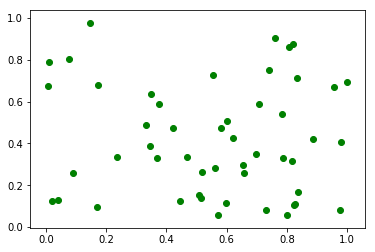

In [4]:
u = npr.random(50)
v = npr.random(50)
plt.scatter(u, v, color='g');

3. (frh.) Teiknið slembigögnin úr reitnum #PLÖNTUR með scatter. 
   - Skammstafa má color með c og rita ``plt.scatter(x, y, c=litur)``, t.d. ``c='tomato'``. 
   - Litir geta verið r, g, b, y, w, k (black), c (cyan), m (magenta) eða [nafn](https://stackoverflow.com/a/37232760/256368)
   - Bætið við rúðuneti með ``plt.grid()``
   - Hægt er að merkja x-ás með ``plt.xlabel``, t.d. ``plt.xlabel('Aldur (ár)')`` og sömuleiðis y-ás 

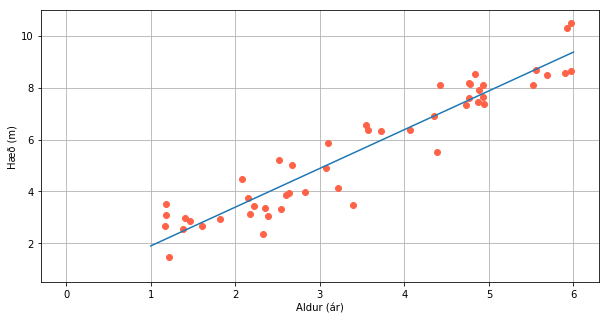

In [19]:
#DÆMI-2.3
plt.figure(figsize=(10,5))
plt.scatter(x,y,c='tomato')
plt.grid(); 
plt.xlabel('Aldur (ár)'); 
plt.ylabel('Hæð (m)');
a, b = np.polyfit(x,y,1)
X = np.array([1, 6])
Y = a*X + b
plt.plot(X,Y,1);

4. Við viljum finna "jöfnu bestu línu", sem sé beina línu sem lýsir gagnasafninu vel.
   Ef jafna línunnar er $y = l(x) = ax + b$ þá viljum við velja $a$ og $b$ þannig að 
   summan af (lóðréttum) fjarlægðum punktanna frá línunni í öðru veldi verði sem minnst.
   Með öðrum orðum viljum við lágmarka fallið:
   
   $$
   S(a,b) = \sum_{i=1}^{50}(ax_i + b - y_i)^2
   $$
   
   Skoðum [þennan kafla](https://en.wikipedia.org/wiki/Linear_least_squares#Example) í 
   Wikipediu-greininni um línuleg minnstu kvaðröt (*Linear least squares*) til að 
   glöggva okkur á þessu.
   Við getum beðið með að skoða stærðfræðina sem nota má til að finna $a$ og $b$
   því það er til NumPy fall sem gerir það fyrir okkur:
   
       (a,b) = np.polyfit(x,y,1)
       
   Síðasti stikinn (sem er 1 hér) er stigið á margliðunni sem við ákvörðum, en bein
   lína er 1. stigs margliða.

   Næsta skref er að teikna beinu línuna inn á grafið í lið 3. Það getum við gert með því 
   að finna endapunkta hennar: 

   $$
   (X_0, Y_0) = (1, l(1)) = (1, 1a + b) \text{ og }\\
   (X_1, Y_1) = (6, l(6)) = (6, 6a + b)
   $$

   og teikna svo strik frá $(X_0, Y_0)$ til $(X_1, Y_1)$. Þetta er auðvelt í Python:

        X = np.array([1,6])
        Y = a*X + b
        plt.plot(X,Y)
        
   (því ``*`` og ``+`` verka stakvís á vigra) 

### 3. Hiti og úrkoma
Náið í skrána ``hiti-úrkoma.txt`` á Piazza. Skráin geymir ársmeðalhita og heildarúrkomu áranna 1949–2018 í Stykkishólmi og byrjar svona:

        1949	3.2	565.5
        1950	4.0	535.5
        1951	3.4	460.6
        ...

Með hliðsjón af liðum 5 & 6 í skiladæmi S3.1 má lesa gögnin inn í Python með:

        (ár,h,r) = np.loadtxt('hiti-úrkoma.txt').T
        
Ef tími vinnst til vinnum við svo áfram með þessi gögn í fyrirlestrinum.